In [6]:
import random, enum

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(100000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if younger == Kid.GIRL or older == Kid.GIRL:
        either_girl += 1

print("P(both|older)", both_girls / older_girl)
print("P(both|either)", both_girls / either_girl)


P(both|older) 0.49886036468330136
P(both|either) 0.3327687383302214


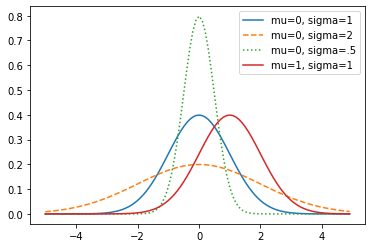

In [34]:
import math
import matplotlib.pyplot as plt

SQRT_2_PI = math.sqrt(2*math.pi)

def normal_pdf(x: float, mu: float=0, sigma: float=1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_2_PI * sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=.5) for x in xs], ':', label='mu=0, sigma=.5')
plt.plot(xs, [normal_pdf(x, mu=1,sigma=1) for x in xs], '-', label='mu=1, sigma=1')
plt.legend()

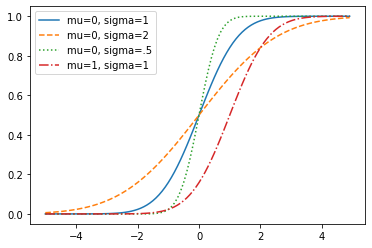

In [37]:
def normal_cdf(x: float, mu: float=0, sigma:float=1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x) for x in xs], '-', label="mu=0, sigma=1")
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label="mu=0, sigma=2")
plt.plot(xs, [normal_cdf(x, sigma=.5) for x in xs], ':', label="mu=0, sigma=.5")
plt.plot(xs, [normal_cdf(x, mu=1) for x in xs], '-.', label="mu=1, sigma=1")

plt.legend()

In [67]:
def inverse_normal_cdf(p: float,
                       mu: float=0,
                       sigma: float=1,
                       tolerance: float=.00001) -> float:
    """find appropriate inverse using binary search"""
    # only compute standard:
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0
    hi_z = 10.0
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:    # too low search above
            low_z = mid_z
        else:            # too hi search below
            hi_z = mid_z
    return mid_z

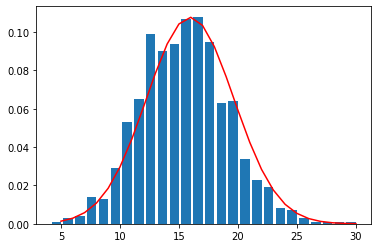

In [79]:
from collections import Counter

def bernoulli_trial(p: float) -> int:
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]
    histogram = Counter(data)
    
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    # plot buckets
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()])
    
    # show curve
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(x + 0.5, mu, sigma) - normal_cdf(x - 0.5, mu, sigma) for x in xs]
    plt.plot(xs, ys, color="red")

binomial_histogram(0.145, 110, 1000)